# MissedEvents

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from numpy import array
from dcprogs.likelihood import QMatrix, DeterminantEq, Asymptotes, find_roots, ExactSurvivor, \
                               ApproxSurvivor, ApproxSurvivor, MissedEventsG, \
                               expm
qmatrix = QMatrix([[ -3050,        50,  3000,      0,    0 ], 
                   [ 2./3., -1502./3.,     0,    500,    0 ],  
                   [    15,         0, -2065,     50, 2000 ],  
                   [     0,     15000,  4000, -19000,    0 ],  
                   [     0,         0,    10,      0,  -10 ] ], 2)
qmatrix = QMatrix([[ -1.639102438935231,  0.9279328542626132,                   0,  0.7111695846726181,                   0,                   0,                   0,                   0,                   0],
       [  7319.818837397022,  -7319.818837397022,                   0,                   0,                   0,                   0,                   0,                   0,                   0],
       [                  0,                   0, -0.5849255773178983,                   0,                   0,                   0, 0.05800330713458401,  0.5269222701833143,                   0],
       [  554.9144283943098,                   0,                   0,   -556.415038972956,   0.670095369096168,  0.8305152095500998,                   0,                   0,                   0],
       [                  0,                   0,                   0,   4445.029004693305,  -4445.029004693305,                   0,                   0,                   0,                   0],
       [                  0,                   0,                   0,  0.7249830360634507,                   0, -0.7855125406770954,                   0,                   0, 0.06052950461364481],
       [                  0,                   0,  0.4346782743227515,                   0,                   0,                   0,  -3554.307968015994,                   0,   3553.873289741671],
       [                  0,                   0,  0.6916315120151144,                   0,                   0,                   0,                   0, -0.6916315120151144,                   0],
       [                  0,                   0,                   0,                   0,                   0,   5390.604449280132,   0.435406457067279,                   0,  -5391.039855737199]], 3)
transitions = qmatrix
tau = 1e-4
a = DeterminantEq(transitions, tau)
G = MissedEventsG(transitions, tau, 4)
approx = ApproxSurvivor(transitions, tau)
exact = ExactSurvivor(transitions, tau)
factor = np.dot(qmatrix.fa, expm(tau*qmatrix.aa))
#print factor
print(G.fa(tau * 1.31838319649))
print(np.dot(exact.fa(tau * 1.31838319649-tau), factor))

[[  5.45096768e+02   3.58690111e-02   4.58704226e-17]
 [  7.25589315e+01   4.77459650e-03  -3.30159469e-18]
 [  1.26939914e-02   8.35302916e-07   5.28345648e-12]
 [  3.84501585e-05   2.53013637e-09   3.88147430e-01]
 [ -7.28448003e-18  -4.79340753e-22   6.91575829e-01]
 [  1.03253949e-03   6.79442118e-08   5.22642795e-06]]
[[  5.45096768e+02   3.58690111e-02   4.58704226e-17]
 [  7.25589315e+01   4.77459650e-03  -3.30159469e-18]
 [  1.26939914e-02   8.35302916e-07   5.28345648e-12]
 [  3.84501585e-05   2.53013637e-09   3.88147430e-01]
 [ -7.28448003e-18  -4.79340753e-22   6.91575829e-01]
 [  1.03253949e-03   6.79442118e-08   5.22642795e-06]]


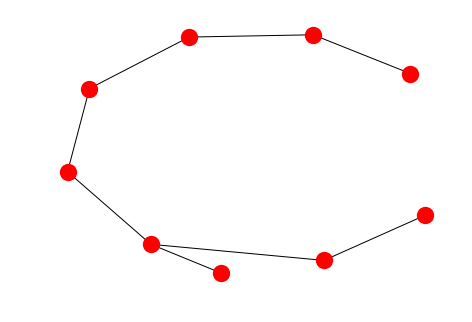

In [4]:
from dcprogs.likelihood import network
from networkx import draw as nx_draw, draw_spectral

graph = network(qmatrix)
nx_draw(graph)

In [5]:
from numpy import outer
from dcprogs.likelihood import Asymptotes, DeterminantEq, eig, inv
eigenvalues, eigenvectors = eig(-qmatrix.matrix)
def get_ci00(i): 
    return outer(eigenvectors[:, i], inv(eigenvectors)[i, :])[:qmatrix.nopen, :qmatrix.nopen]
s = get_ci00(0)
for i in range(1, len(eigenvalues)):
   # if abs(eigenvalues[i]) > 1e-8:
        s += get_ci00(i)
print(s)
print(approx.af_components[0][0] + approx.af_components[1][0] + approx.af_components[2][0])

[[  1.00000000e+00  -3.72362979e-20   3.98565840e-17]
 [ -1.90203993e-16   1.00000000e+00   8.58280665e-28]
 [ -1.83880688e-16  -1.43995601e-20   1.00000000e+00]]
[[  9.99998098e-01   7.10033034e-11  -1.18861914e-21]
 [  5.60101709e-07   1.00000000e+00  -1.19196101e-21]
 [ -1.22912506e-13  -4.23663173e-17   9.99999998e-01]]


0.00030000000000000003
[ 0.0001   0.00011  0.00012  0.00013  0.00014  0.00015  0.00016  0.00017
  0.00018  0.00019  0.0002   0.00021  0.00022  0.00023  0.00024  0.00025
  0.00026  0.00027  0.00028  0.00029  0.0003 ]


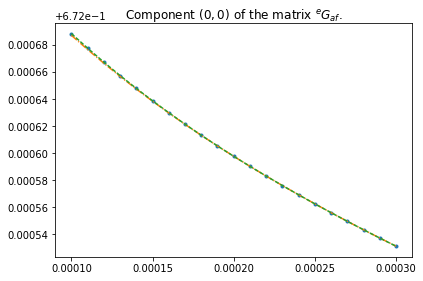

In [6]:
tau, i, j, n = 1e-4, 0, 0, 3

x = np.arange(tau, n * tau, tau / 10.)
fig, ax = plt.subplots(1,1)
ax.plot(x, np.dot(exact.af(x-tau), G.af_factor)[:, i, j], '.', label="exact")
ax.plot(x, np.dot(approx.af(x-tau), G.af_factor)[:, i, j], "-.", label="approx")
ax.plot(x, G.af(x)[:, i, j], '--', label="G")
ax.set_title("Component ${0}$ of the matrix $^{{e}}G_{{af}}$.".format((i, j)))
fig.tight_layout()
#legend()
#display(gcf())
print(G.tmax)
print(x)

In [7]:
from dcprogs.likelihood import DeterminantEq, find_lower_bound_for_roots, eig
a = DeterminantEq([[ -0.9765569699831389,                    0,                    0,                    0,                    0,                    0,   0.9765569699831388,                    0,                    0],
       [                   0,   -21087.12668613774,                    0,                    0,                    0,    4972.429427806393,    9423.400001111493,   0.7672868902249316,    6690.529970329637],
       [                   0,                    0, -0.02903705186960781,                    0,  0.02903705186960781,                    0,                    0,                    0,                    0],
       [                   0,                    0,                    0,   -8967.619224739678,                    0,                    0,                    0,    8967.455151523045,   0.1640732166323416],
       [                   0,                    0,   0.2978885248190503,                    0,  -0.4287224564347299,                    0,                    0,   0.1308339316156797,                    0],
       [                   0,   0.7275421797587975,                    0,                    0,                    0,    -1.19022223735187,                    0,    0.102814653125226,   0.3598654044678464],
       [  0.1209377584689361,  0.05943271459974253,                    0,                    0,                    0,                    0,  -0.1803704730686787,                    0,                    0],
       [                   0,   0.8265398081401302,                    0,   0.6009896070678163,    3588.624442956896,   0.7814141825061616,                    0,    -3590.83338655461,                    0],
       [                   0,   0.8191655510502869,                    0,    8172.231231533744,                    0,    7421.575697898968,                    0,                    0,   -15594.62609498376]], 6, 1e-4)
print(eig(a.H(-126523))[0])
find_lower_bound_for_roots(a)

[ -6.59166060e+05   6.46519434e+05  -3.22595069e+01   2.85250486e+01
  -6.72742082e-01  -2.90668063e-02]


-25304.63240237971